# Unsmoothing Method - MA

This notebook would use Li2CO3 data from investing.com (which totally have data from 2018 to 2023) and the unit is CNY/TON. 

In [10]:
import warnings 
warnings.filterwarnings('ignore')
from utils.utils import transform_data, plot_correlogram, get_stock_data
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
import statsmodels.tsa.arima.model as tsa

In [6]:
li2co3 = transform_data("../data/Lithium Carbonate 99%Min China Spot Historical Data.csv")

         Date       Price        Open        High         Low  Vol. Change %
0  10/27/2023  155,500.00  155,500.00  158,000.00  153,000.00   NaN   -1.27%
1  10/26/2023  157,500.00  157,500.00  160,000.00  155,000.00   NaN   -1.25%
2  10/25/2023  159,500.00  159,500.00  162,000.00  157,000.00   NaN    1.27%
3  10/24/2023  157,500.00  157,500.00  160,000.00  155,000.00   NaN   -0.63%
4  10/23/2023  158,500.00  158,500.00  161,000.00  156,000.00   NaN   -2.46%


Please enter the column names, separated by a comma:  Date, Price, 1, 2, 3, 4, 5


<AxesSubplot: xlabel='Date'>

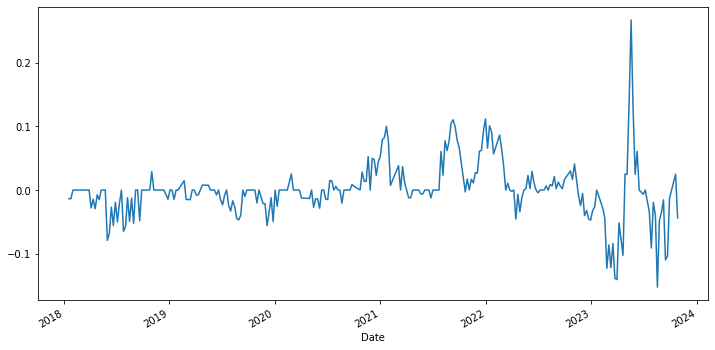

In [7]:
# Specify the size of the figure
plt.figure(figsize=(12, 6))
li2co3.Log_Return.plot()

In [14]:
# ro is observed data
ro = li2co3[li2co3.index > '2018-05-26'].Log_Return

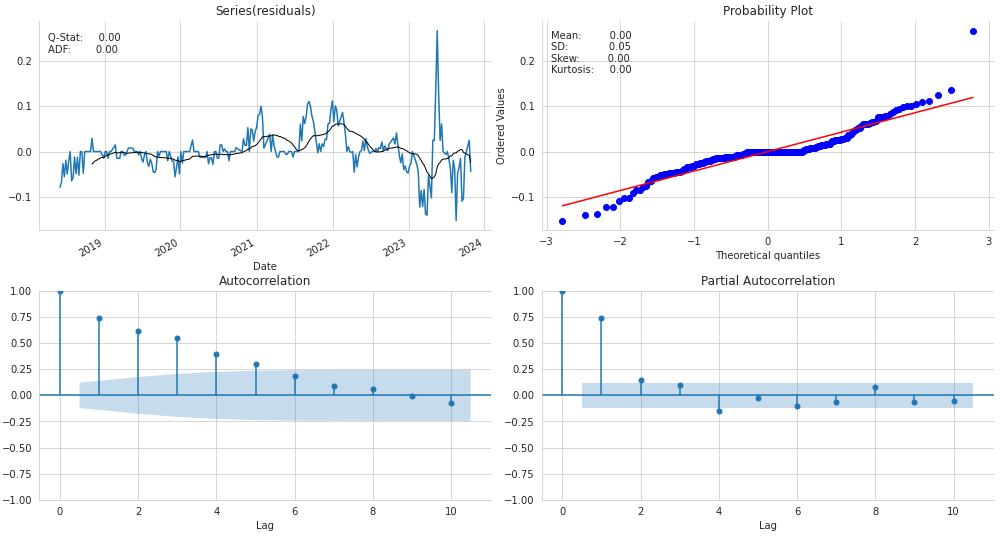

In [15]:
plot_correlogram(ro)

## MA: q = 1

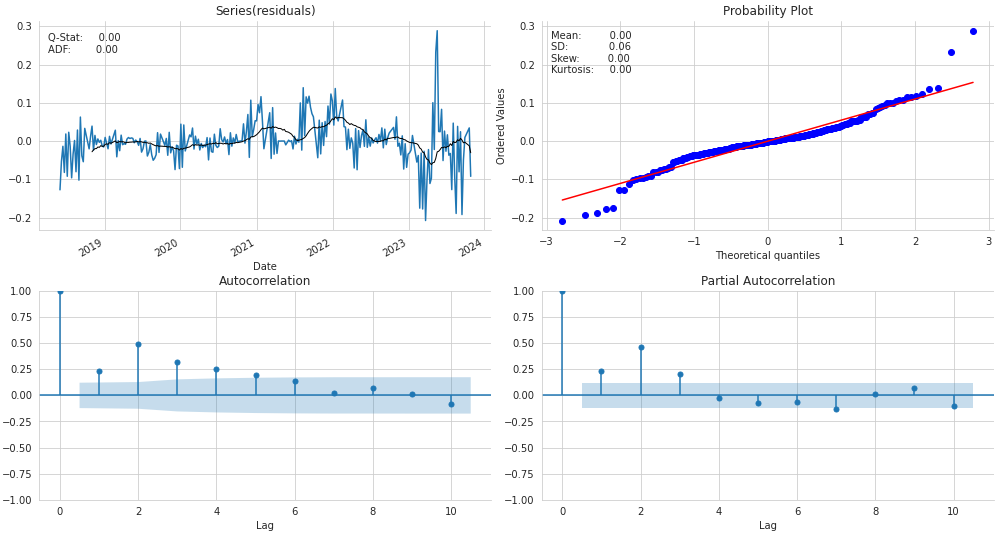

In [13]:
# ro_stationary 

MA_1_result = model_price = tsa.ARIMA(ro,order=(0,0,1)).fit()
mu, theta1, std = MA_1_result.params
residual = MA_1_result.resid
fitted = mu + (1+theta1) * residual

plot_correlogram(fitted)

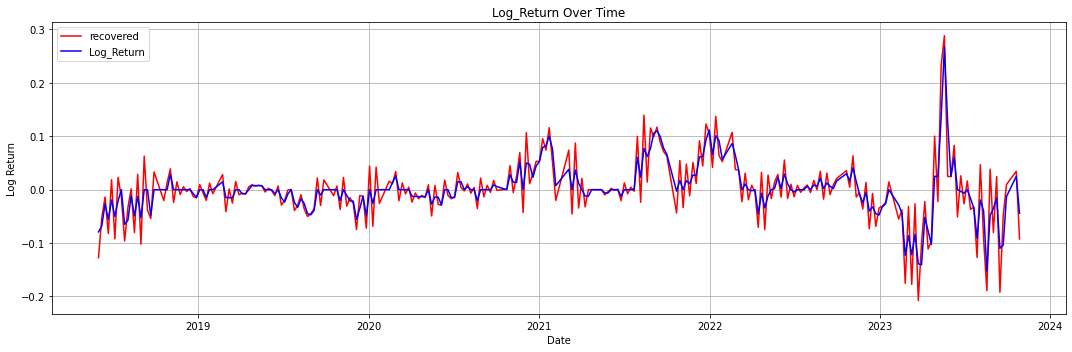

In [17]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## MA: q = 2

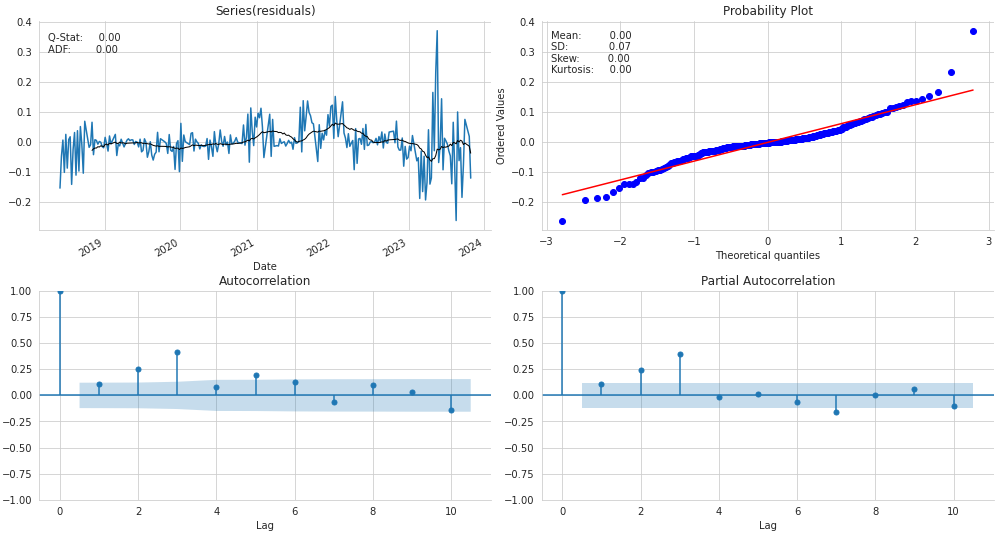

In [20]:
MA_2_result = model_price = tsa.ARIMA(ro,order=(0,0,2)).fit()

mu, theta1, theta2, std = MA_2_result.params

residual = MA_2_result.resid
fitted_2 = mu + (1+theta1+theta2) * residual

plot_correlogram(fitted_2)

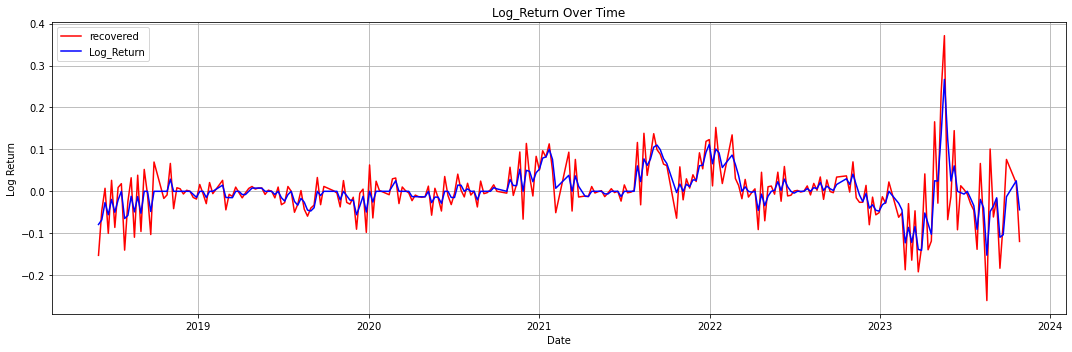

In [21]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_2, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## MA: q = 3 

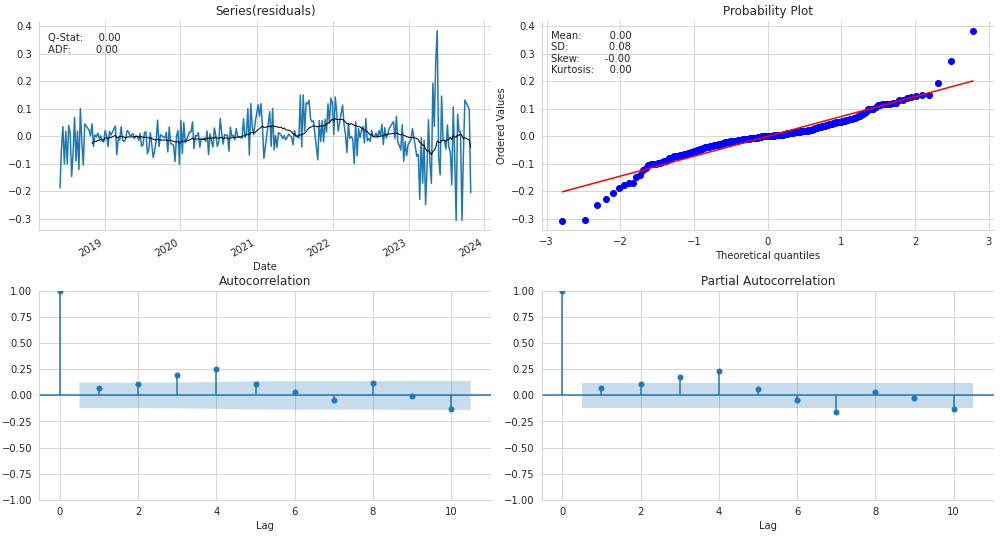

In [22]:
MA_3_result = model_price = tsa.ARIMA(ro,order=(0,0,3)).fit()

mu, theta1, theta2, theta3, std = MA_3_result.params

residual = MA_3_result.resid
fitted_3 = mu + (1+theta1+theta2+theta3) * residual

plot_correlogram(fitted_3)

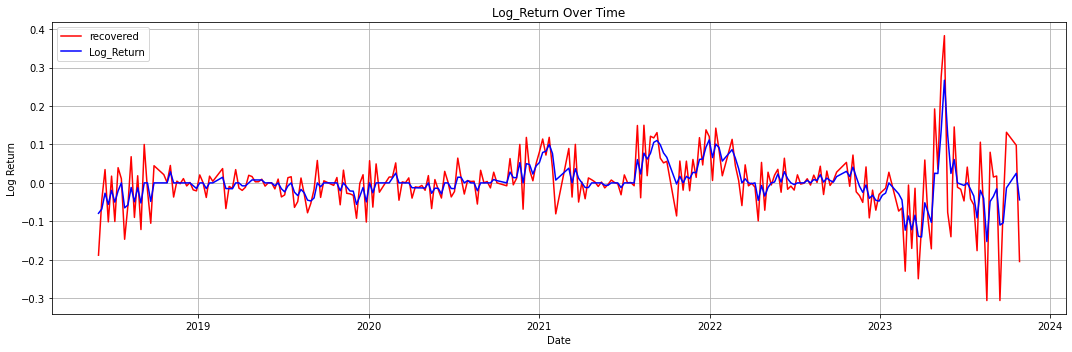

In [23]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_3, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## MA: q = 4 

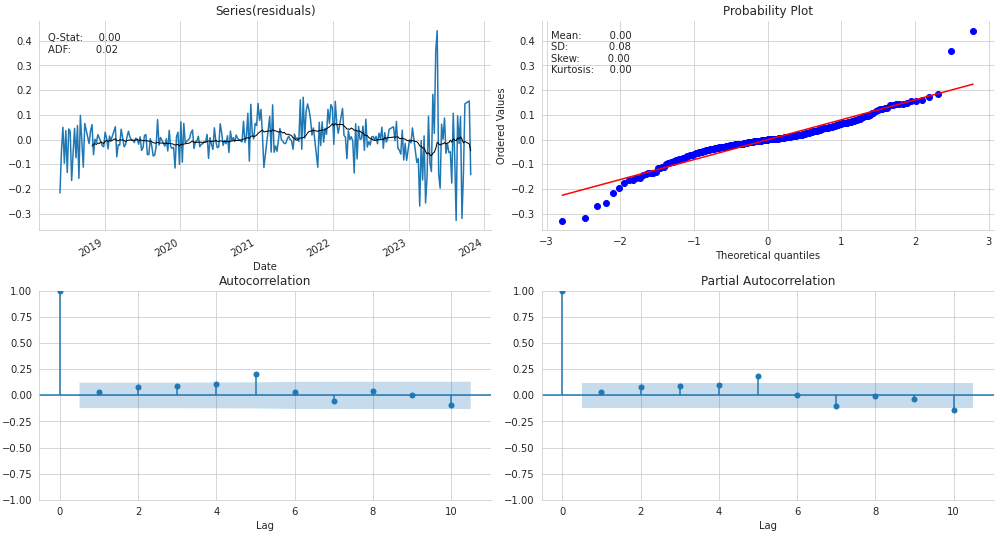

In [24]:
MA_4_result = model_price = tsa.ARIMA(ro,order=(0,0,4)).fit()

mu, theta1, theta2, theta3, theta4, std = MA_4_result.params

residual = MA_4_result.resid
fitted_4 = mu + (1+theta1+theta2+theta3 +theta4) * residual
plot_correlogram(fitted_4)

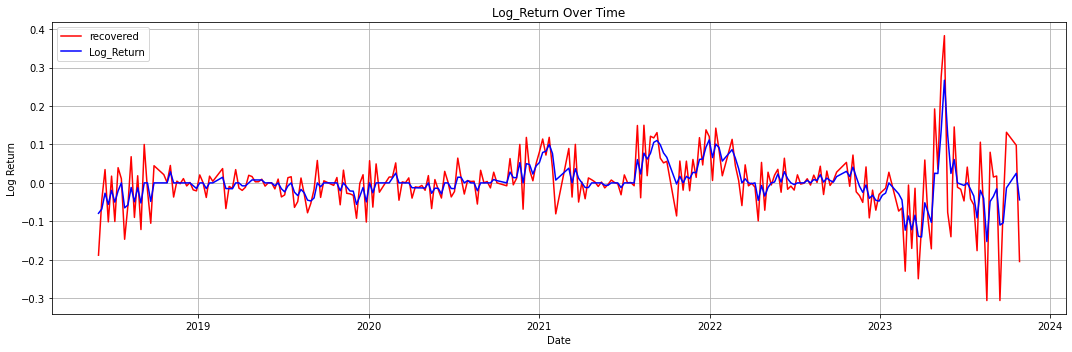

In [25]:
# plot fitted and original one: 

# Separate plot for 'Log_Return' for clarity and because it might be on a different scale
plt.figure(figsize=(15, 5))
plt.plot(ro.index, fitted_3, label="recovered", color="red")
plt.plot(ro.index, ro, label="Log_Return", color="blue")
plt.title("Log_Return Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()